In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
filepath = r'C:\Users\ASUS\Downloads\Banana.csv'
macro_data = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')
print(macro_data.shape)  # (123, 8)
macro_data.head()

(1098, 4)


,Maximum Temperature(Avg),Minimum Temperature(Avg),Daily Precipitation,Average_Price
Date,,,,
2018-01-01,20.0,3.8,0.0,42.5
2018-01-02,16.8,4.5,0.0,42.5
2018-01-03,24.0,12.5,0.0,42.5
2018-01-04,26.8,10.5,0.0,42.5
2018-01-05,22.8,14.8,0.0,42.5


In [3]:
bx=macro_data.resample('W-Mon').mean().loc['2018-01-01':'2021-01-01']

bx.head(50)

,Maximum Temperature(Avg),Minimum Temperature(Avg),Daily Precipitation,Average_Price
Date,,,,
2018-01-01,20.000000,3.800000,0.000000,42.500000
2018-01-08,25.042857,14.114286,0.000000,42.500000
2018-01-15,23.428571,9.771429,0.000000,63.214286
2018-01-22,19.757143,4.442857,0.000000,65.000000
2018-01-29,18.385714,4.014286,0.871429,65.000000
2018-02-05,21.871429,7.900000,0.000000,65.000000
2018-02-12,26.814286,15.957143,0.214286,65.000000
2018-02-19,22.257143,7.371429,0.000000,66.428571
2018-02-26,23.200000,7.700000,0.000000,75.000000


In [4]:
bx.isna().sum()

Maximum Temperature(Avg)    0
Minimum Temperature(Avg)    0
Daily Precipitation         0
Average_Price               0
dtype: int64

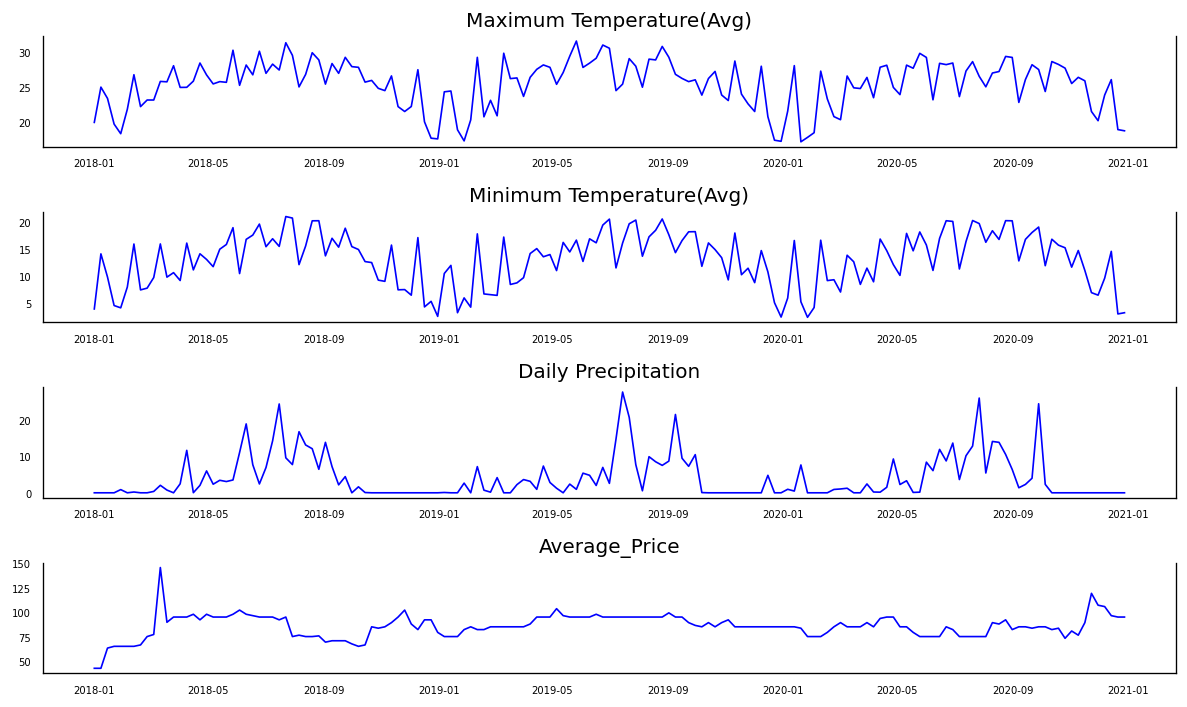

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = bx[bx.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # Decorations
    ax.set_title(bx.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [6]:
ad_fuller_result_1 = adfuller(bx['Average_Price'])#.diff()[1:])
print('realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')



print('\n---------------------\n')

ad_fuller_result_2 = adfuller(bx['Maximum Temperature(Avg)'])#.diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realgdp
ADF Statistic: -5.951244091645805
p-value: 2.1446581443826628e-07

---------------------

realcons
ADF Statistic: -3.8872492064274518
p-value: 0.0021307158458268604


In [7]:
print('Maximum Temperature causes Average_Price?\n')
print('------------------')
granger_1 = grangercausalitytests(bx[['Average_Price', 'Maximum Temperature(Avg)']], 4)

print('\nulc causes rgnp?\n')
print('------------------')
granger_2 = grangercausalitytests(bx[['Maximum Temperature(Avg)', 'Average_Price']], 4)

Maximum Temperature causes Average_Price?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4497  , p=0.5035  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=0.4585  , p=0.4983  , df=1
likelihood ratio test: chi2=0.4578  , p=0.4986  , df=1
parameter F test:         F=0.4497  , p=0.5035  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1709  , p=0.8431  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=0.3531  , p=0.8382  , df=2
likelihood ratio test: chi2=0.3527  , p=0.8383  , df=2
parameter F test:         F=0.1709  , p=0.8431  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1611  , p=0.9224  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=0.5062  , p=0.9175  , df=3
likelihood ratio test: chi2=0.5054  , p=0.9177  , df=3
parameter F test:         F=0.1611  , p=0.9224  , df_denom=147, df_num=3

Granger Causality
number of lag

In [8]:
bx= bx[['Maximum Temperature(Avg)','Average_Price']]
print(bx.shape)

(157, 2)


In [9]:
train_df=bx[:-12]
test_df=bx[-12:]

In [10]:
print(test_df.shape)

(12, 2)


In [11]:
model = VAR(train_df)

In [12]:
sorted_order=model.select_order(maxlags=12)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        6.714       6.757       823.5       6.731
1        5.265       5.396       193.5       5.318
2        5.303       5.521       201.0       5.392
3        5.325       5.629       205.5       5.449
4       4.950*      5.341*      141.3*      5.109*
5        4.990       5.468       147.0       5.184
6        4.991       5.556       147.3       5.221
7        5.003       5.655       149.2       5.268
8        4.966       5.705       143.9       5.267
9        4.998       5.823       148.6       5.333
10       4.993       5.905       148.1       5.363
11       4.999       5.999       149.4       5.406
12       5.034       6.121       155.0       5.476
--------------------------------------------------


In [13]:
var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                         Statespace Model Results                                        
Dep. Variable:     ['Maximum Temperature(Avg)', 'Average_Price']   No. Observations:                  145
Model:                                                    VAR(4)   Log Likelihood                -834.584
                                                     + intercept   AIC                           1711.167
Date:                                           Thu, 10 Mar 2022   BIC                           1773.679
Time:                                                   18:01:34   HQIC                          1736.568
Sample:                                               01-01-2018                                         
                                                    - 10-05-2020                                         
Covariance Type:                                             opg                                         
Ljung-Box (L1) (Q):             0.78, 0.15   J

In [14]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="2018-01-01",end='2021-01-01')

predictions=predict.predicted_mean

In [15]:
predictions.columns=['Maximum Temperature(Avg)_predicted','Average_predicted']
predictions

,Maximum Temperature(Avg)_predicted,Average_predicted
2020-10-12,25.290555,84.351337
2020-10-19,26.931529,84.156415
2020-10-26,27.237621,84.668865
2020-11-02,25.420012,84.405580
2020-11-09,25.233980,84.145971
2020-11-16,26.125365,83.920825
2020-11-23,26.714469,84.203491
2020-11-30,25.851696,84.181895
2020-12-07,25.400022,84.057156
2020-12-14,25.742513,83.884084


In [16]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)
test_vs_pred=pd.concat([bx['Average_Price'], test_vs_pred],axis=1)
test_vs_pred.head()

,Average_Price,Maximum Temperature(Avg),Average_Price,Maximum Temperature(Avg)_predicted,Average_predicted
2018-01-01,42.500000,NaN,NaN,NaN,NaN
2018-01-08,42.500000,NaN,NaN,NaN,NaN
2018-01-15,63.214286,NaN,NaN,NaN,NaN
2018-01-22,65.000000,NaN,NaN,NaN,NaN
2018-01-29,65.000000,NaN,NaN,NaN,NaN


In [17]:
test_vs_pred.drop(['Maximum Temperature(Avg)','Maximum Temperature(Avg)_predicted'], axis='columns', inplace=True)

Text(0.5, 1.0, 'Forecasting of Banana using VAR model')

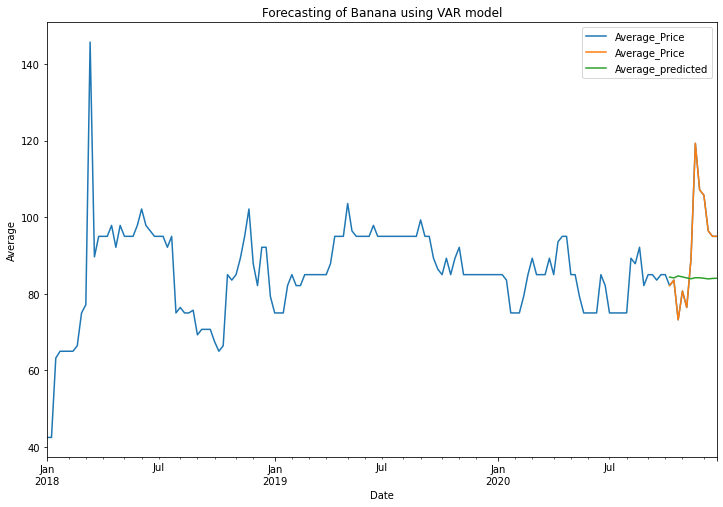

In [22]:
test_vs_pred.plot(figsize=(12,8), xlabel='Date' , ylabel='Average').set_title("Forecasting of Banana using VAR model")


In [21]:
from sklearn.metrics import mean_absolute_error
import math 
from statistics import mean


mae_Average=math.sqrt(mean_absolute_error(predictions['Average_predicted'],test_df['Average_Price']))
print('Mean value of Average_Price is : {}.Root Mean Squared Error is :{}'.format(mean(test_df['Average_Price']),mae_Average))

Mean value of Average_Price is : 91.99404761904762.Root Mean Squared Error is :3.478471500029456


In [ ]:
import statsmodels
import pickle
print('statsmodels: %s' % statsmodels.__version__)


In [ ]:
pickle.dump(model, open(r'C:\Users\ASUS\OneDrive\Desktop\New folder\Banana_VAR_model.pkl', "wb"))

In [ ]:
loaded = pickle.load(open(r'C:\Users\ASUS\OneDrive\Desktop\New folder\Banana_VAR_model.pkl', "rb"))

In [ ]:

loaded = var_model.fit(disp=False)
predict2 = loaded.predict(start=len(train_df),end=len(train_df) + n_forecast-1)#start="2018-01-01",end='2021-01-01')

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(bx['Average_Price'], label='Training Data')
plt.plot(predict2['Average_Price'], label='Prediction')
plt.legend()
plt.savefig('Banana1.png')

In [ ]:
len(bx)
